In [1]:
#1 Import Necessary Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

Prepare a model for glass classification using KNN
Data Description:

RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [2]:
#2 Import data 
glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#3 Initial Analysis
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


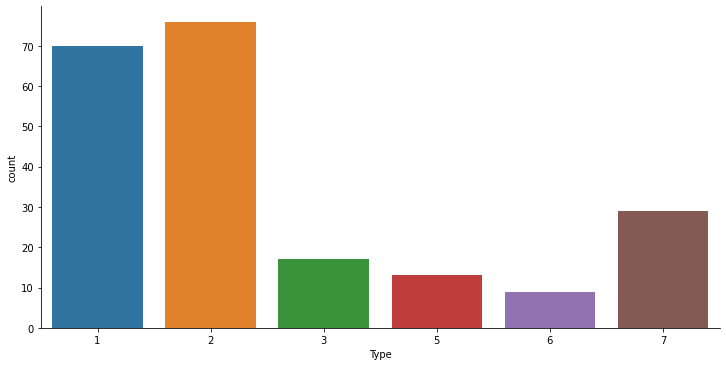

In [28]:
sns.factorplot('Type', data=glass_data, kind="count",size = 5,aspect = 2)
plt.show()

#Type 2 --building_windows_non_float_processed is in the majority of glass

##### Model Building

In [6]:
X=glass_data.drop(labels='Type',axis=1)
y=glass_data[['Type']]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [8]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((171, 9), (43, 9), (171, 1), (43, 1))

In [9]:
#4 Model Training|Testing|Evaluating
# Generating a model with K=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)

<ipython-input-9-24560799dda5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train,y_train)


In [10]:
y_train_pred = knn_model.predict(X_train)

In [11]:
print('accuracy score of training model :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model     :' , accuracy_score(y_test,y_test_pred))

accuracy score of training model : 0.7894736842105263
accuracy score of test model     : 0.6976744186046512


In [12]:
#Generating a model with k=3 , but with STANDARDIZATION
scaler= StandardScaler()
scaledX= scaler.fit_transform(X)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((171, 9), (171, 1), (43, 9), (43, 1))

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)

<ipython-input-14-57fcfc23cece>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train,y_train)


In [15]:
y_test_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)
print('accuracy score of training model2 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model2     :' , accuracy_score(y_test,y_test_pred))

accuracy score of training model2 : 0.8187134502923976
accuracy score of test model2     : 0.7674418604651163


In [23]:
#Generating a model with k=4
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)
print('accuracy score of training model3 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model3     :' , accuracy_score(y_test,y_test_pred))

accuracy score of training model3 : 0.783625730994152
accuracy score of test model3     : 0.6976744186046512


In [25]:
#Generating a model with k=5 , but with STANDARDIZATION
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)
print('accuracy score of training model4 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model4     :' , accuracy_score(y_test,y_test_pred))

accuracy score of training model4 : 0.7251461988304093
accuracy score of test model4     : 0.6511627906976745


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaledX,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [18]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

In [19]:
neighbours[cv_scores.index(max(cv_scores))]

3

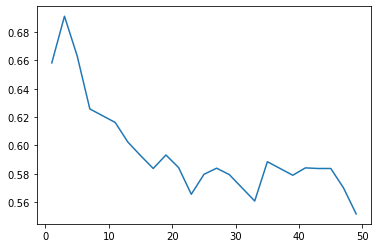

In [20]:
#Vizualizing the K neighbours wrt CV
plt.plot(neighbours,cv_scores)

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674
